
# *E. coli* Simulation Analysis

## Set up for analysis
### Load libraries

In [1]:
# %load_ext autoreload
# %autoreload 2
%matplotlib inline

# Load the libraries we need
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mpld3
import warnings

# Add wcEcoli root to the path, so we can load sim libraries
WC_ECOLI_DIRECTORY = os.path.expanduser("~/wcEcoli")
sys.path.append(WC_ECOLI_DIRECTORY)

# Load the sim libraries we need
from models.ecoli.analysis.readers.reader import Reader

# Initialise stuff
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['font.size'] = 6.0

# IPython graphing produces a bunch of warnings we don't care about
warnings.filterwarnings('ignore') 

# mpld3.enable_notebook()

### Set paths to simulation data

In [2]:
# Fitted simulation data for the sim we're analysing
simData = "/home/acjs/wcEcoli/out/20160301.152504.128116/kb/simData_Fit_1.cPickle"

# Simulation output directory
simOut = "/home/acjs/wcEcoli/out/20160301.152504.128116/wildtype_000000/000000/generation_000000/000000/simOut/"

+ Could autogenerate a notebook per simulation run

### Load reader so we can access the data

In [3]:
r = Reader(simData, simOut)

# Analysis

## Metabolism

A basic plot

In [5]:
r.fbaResults.externalExchangeFluxes['PROTON[p]']

1970-01-01 00:00:00.000000000    0.000000
1970-01-01 00:00:00.200000000   -0.000000
1970-01-01 00:00:00.400000000   -0.000000
1970-01-01 00:00:00.600000000   -0.000000
1970-01-01 00:00:00.800000000   -0.000000
1970-01-01 00:00:01.000000000   -0.000000
1970-01-01 00:00:01.820313000   -0.000000
1970-01-01 00:00:02.640625000    0.239652
1970-01-01 00:00:03.460938000    1.260459
1970-01-01 00:00:04.281250000    1.625136
1970-01-01 00:00:05.101563000    1.517167
1970-01-01 00:00:05.949219000    1.695832
1970-01-01 00:00:06.796875000    0.656582
1970-01-01 00:00:07.644531000    1.450558
1970-01-01 00:00:08.492188000    1.409473
1970-01-01 00:00:09.339844000    1.390668
1970-01-01 00:00:10.218750000    1.209076
1970-01-01 00:00:11.097656000    1.612568
1970-01-01 00:00:11.964844000    1.404551
1970-01-01 00:00:12.832031000    1.212196
1970-01-01 00:00:13.699219000    1.514273
1970-01-01 00:00:14.566406000    1.291857
1970-01-01 00:00:15.433594000    1.366702
1970-01-01 00:00:16.300781000    1

<IPython.core.display.Javascript object>


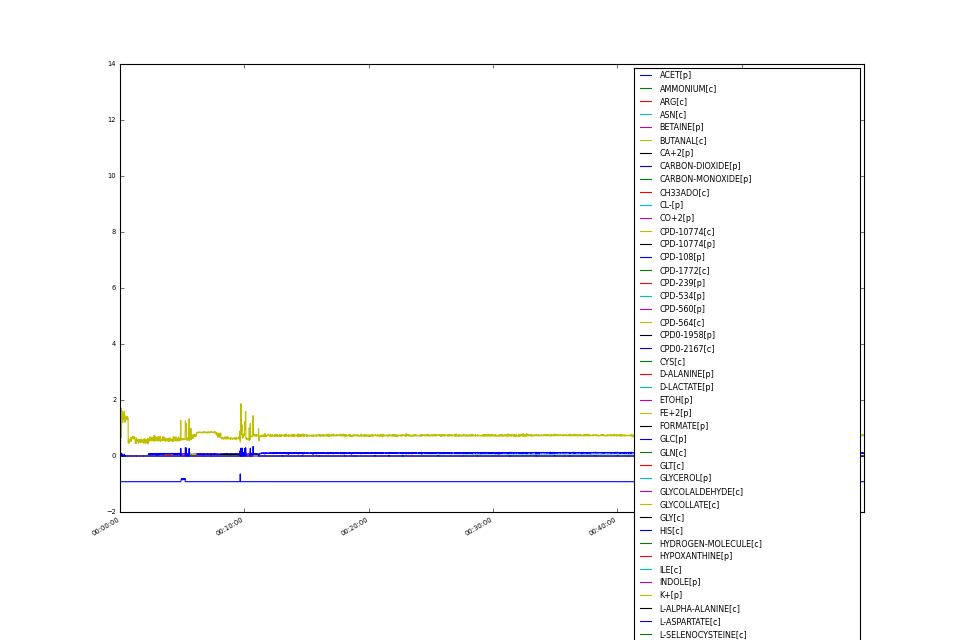

In [82]:
r.fbaResults.externalExchangeFluxes.plot()

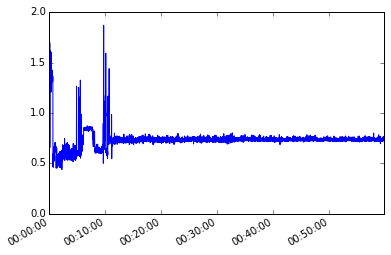

In [16]:
%matplotlib inline
r.fbaResults.externalExchangeFluxes['PROTON[p]'].plot()

External fluxes

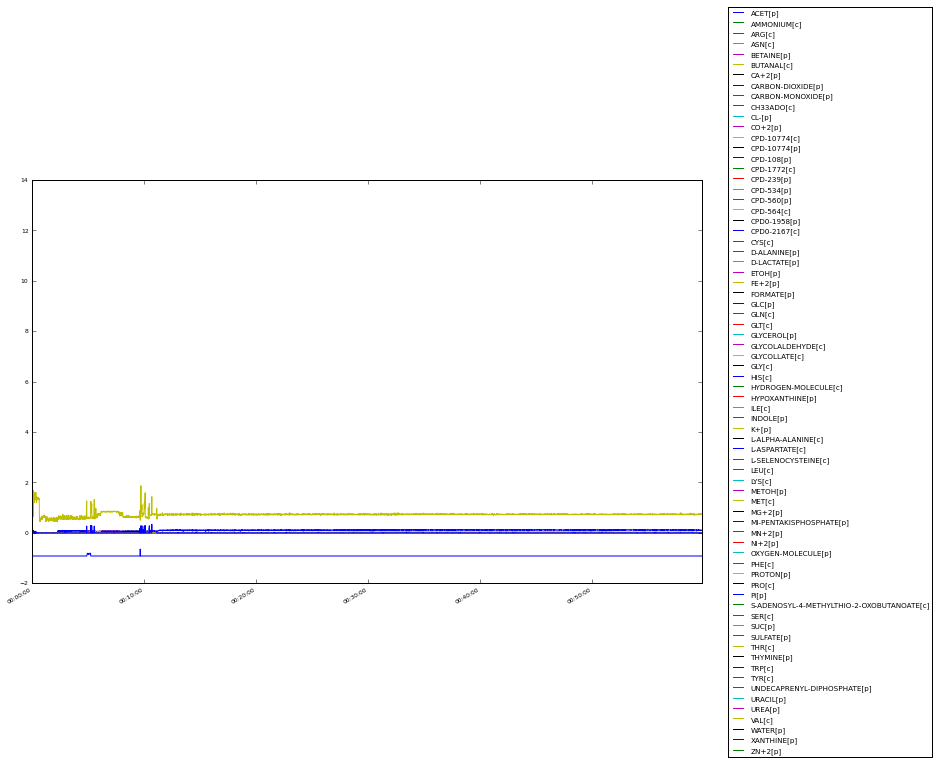

In [6]:
ax = r.fbaResults.externalExchangeFluxes.plot().legend(loc='center right', bbox_to_anchor=(1.35, 0.5))

Interactivity

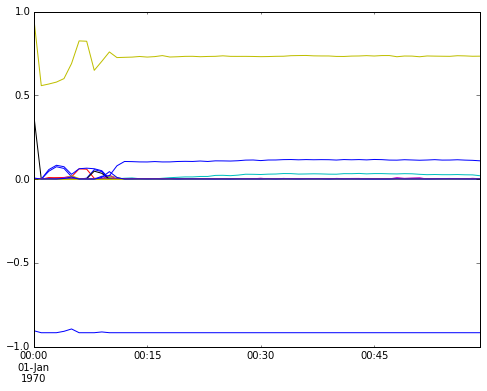

In [8]:
%matplotlib inline
mpld3.enable_notebook()

fig, ax = plt.subplots(1,1, figsize=(8,6))
r.fbaResults.externalExchangeFluxes.resample('1Min').plot(ax=ax, legend=False)

for i, line in enumerate(ax.lines):
    mpld3.plugins.connect(fig, mpld3.plugins.LineLabelTooltip(line, r.fbaResults.externalExchangeFluxes.columns[i]))

In [9]:
mpld3.disable_notebook()

In [10]:
%matplotlib notebook

def showfba(start_time=0, run_for=20):
    mpld3.disable_notebook()

    plt.rcParams['figure.figsize'] = (12, 8)
    plt.rcParams['font.size'] = 6

    fig, ax = plt.subplots(1,1)

    start = pd.to_datetime(start_time, unit="s")
    end = pd.to_datetime(start_time + run_for, unit="s")
    
    data = r.fbaResults.externalExchangeFluxes.iloc[100,:].reshape(8,9)
    im = ax.imshow(data, interpolation='nearest', aspect='auto', cmap='RdBu')

    t = ax.annotate("00:00:00", xy=(-30,2), xycoords='axes points')

    x, y = np.meshgrid(range(9), range(8))
    for i, coord in enumerate(zip(x.flatten(), y.flatten())):
        label = r.fbaResults.externalExchangeFluxes.columns[i]
        if len(label) > 10:
            label = label[:10]
        ax.annotate(label, xy=coord, ha="center")
    fig.canvas.draw()

    fig.colorbar(im)
    plt.show()
    for i, row in r.fbaResults.externalExchangeFluxes[start:end].iterrows():
        im.set_data(row.reshape(8,9))
        t.set_text(i.strftime('%H:%M:%S'))
        fig.canvas.draw()

<IPython.core.display.Javascript object>


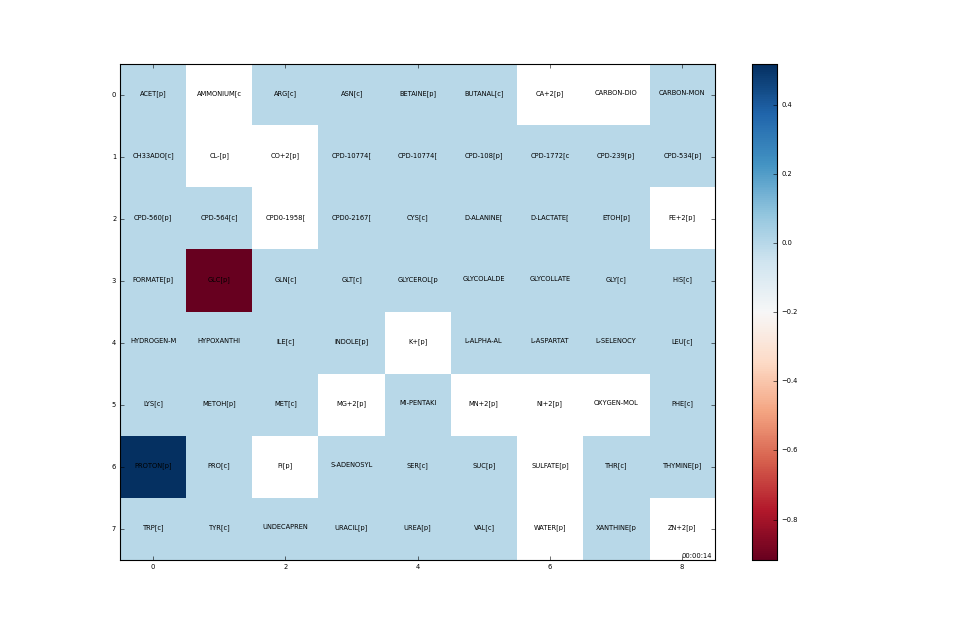

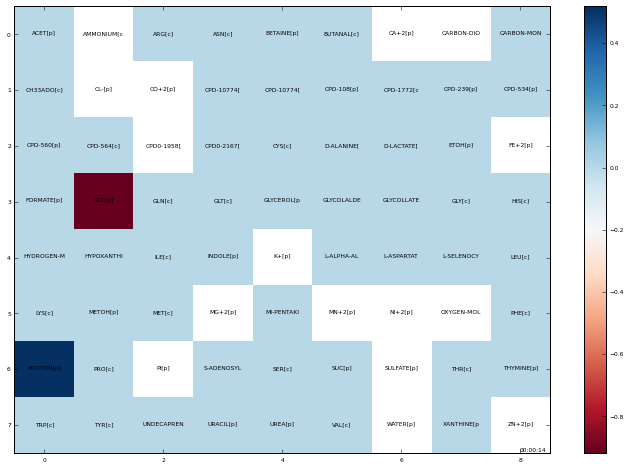

In [11]:
showfba(0, 15)

In [17]:
r.bulkMolecules.counts['ARG[c]']

1970-01-01 00:00:00.000000000    253780
1970-01-01 00:00:00.200000000    254953
1970-01-01 00:00:00.400000000    255031
1970-01-01 00:00:00.600000000    255265
1970-01-01 00:00:00.800000000    255407
1970-01-01 00:00:01.000000000    255967
1970-01-01 00:00:01.820313000    255929
1970-01-01 00:00:02.640625000    256133
1970-01-01 00:00:03.460938000    256585
1970-01-01 00:00:04.281250000    256455
1970-01-01 00:00:05.101563000    256555
1970-01-01 00:00:05.949219000    256714
1970-01-01 00:00:06.796875000    256726
1970-01-01 00:00:07.644531000    256721
1970-01-01 00:00:08.492188000    256890
1970-01-01 00:00:09.339844000    256999
1970-01-01 00:00:10.218750000    257180
1970-01-01 00:00:11.097656000    257204
1970-01-01 00:00:11.964844000    257285
1970-01-01 00:00:12.832031000    257413
1970-01-01 00:00:13.699219000    257443
1970-01-01 00:00:14.566406000    257559
1970-01-01 00:00:15.433594000    257561
1970-01-01 00:00:16.300781000    257851
1970-01-01 00:00:17.167969000    257825


<IPython.core.display.Javascript object>


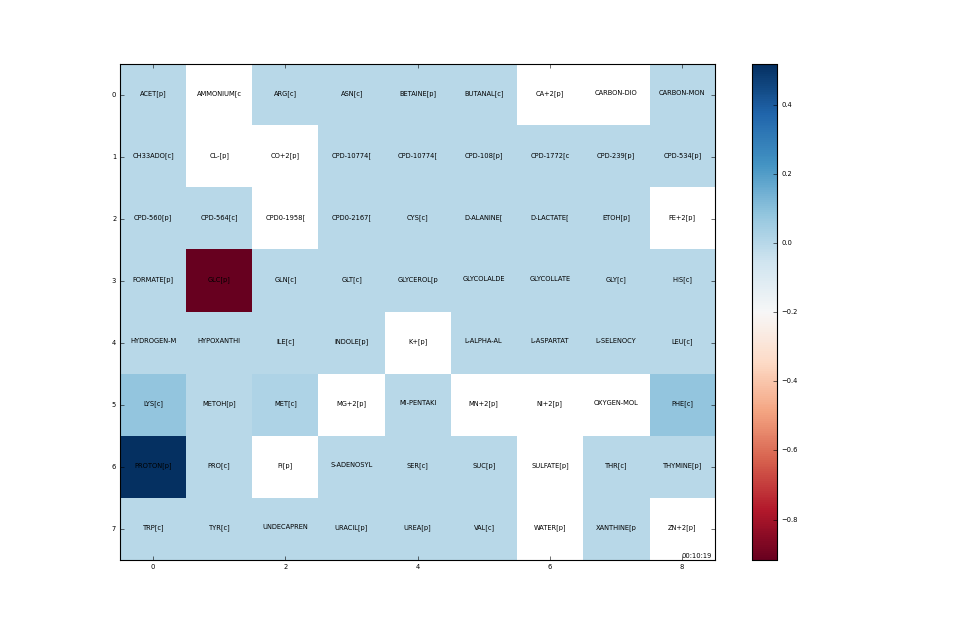

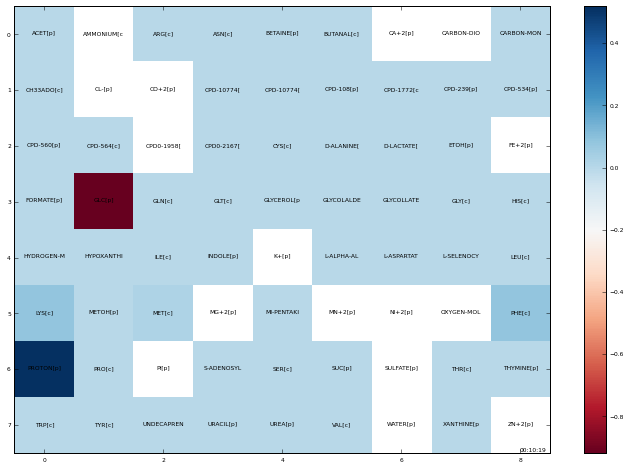

In [12]:
showfba(580, 40)

In [11]:
r.fbaResults.reactionFluxes.max()

1.1.1.83-RXN                                                                                                                                 0.000000e+00
DALADEHYDROG-RXN-D-ALANINE/CPD-9728/WATER//AMMONIUM/PYRUVATE/REDUCED-MENAQUINONE.64.                                                         0.000000e+00
RXN-14483-CPD-16502/WATER//CPD-16501/Pi.30.                                                                                                  0.000000e+00
TRANS-RXN0-567 (reverse)                                                                                                                     0.000000e+00
3.2.1.17-RXN-C6/WATER//C5/N-ACETYL-D-GLUCOSAMINE.36.                                                                                         0.000000e+00
TAGAALDOL-RXN (reverse)                                                                                                                      0.000000e+00
RXN0-7074                                                                   

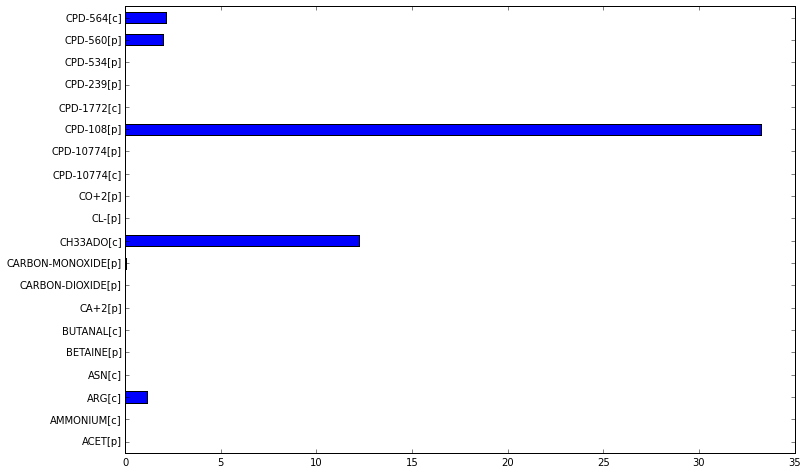

In [45]:
%matplotlib inline
mpld3.disable_notebook()
plt.rcParams['figure.figsize'] = (12,8)
plt.figure()
r.fbaResults.externalExchangeFluxes.iloc[:,:20].sum().plot.barh()

In [12]:
# r.fbaResults.reactionFluxes['DAHPSYN-RXN'].plot()
# r.fbaResults.externalExchangeFluxes['GLC[p]'].plot()
np.any(r.fbaResults.externalExchangeFluxes == -np.inf)

True

In [32]:
!cat ../reconstruction/ecoli/flat/reactions.tsv | grep OXYGEN-MOLECULE | awk '{ print $1, ","}'

"RXN0-5266-CPD-9956/OXYGEN-MOLECULE/PROTON//UBIQUINONE-8/WATER/PROTON.59." ,
"OCTAPRENYL-METHYL-METHOXY-BENZOQ-OH-RXN" ,
"PMPOXI-RXN" ,
"PNPOXI-RXN" ,
"RXN0-6973" ,
"RXN0-1461" ,
"RXN0-280-CPD-3745/FMNH2/OXYGEN-MOLECULE//GLYCOLALDEHYDE/SO3/FMN/WATER/PROTON.68." ,
"L-ASPARTATE-OXID-RXN" ,
"RXN0-1483[CCO-PERI-BAC]-FE+2/PROTON/OXYGEN-MOLECULE//FE+3/WATER.54." ,
"2-OCTAPRENYLPHENOL-HYDROX-RXN" ,
"RXN0-5364" ,
"2-OCTAPRENYL-6-METHOXYPHENOL-HYDROX-RXN" ,
"RXN0-2945" ,
"SUPEROX-DISMUT-RXN[CCO-PERI-BAC]-SUPER-OXIDE/PROTON//HYDROGEN-PEROXIDE/OXYGEN-MOLECULE.68." ,
"TRANS-RXN0-474" ,
"CATAL-RXN" ,
"RXN-13418" ,
"RXN0-5268-CPD-9956/OXYGEN-MOLECULE/PROTON//UBIQUINONE-8/WATER/PROTON.59." ,
"RXN0-3921" ,
"RXN0-280-CPD-10434/FMNH2/OXYGEN-MOLECULE//ACETALD/SO3/FMN/WATER/PROTON.62." ,
"RXN0-280-CPD-3746/FMNH2/OXYGEN-MOLECULE//FORMALDEHYDE/SO3/FMN/WATER/PROTON.66." ,
"RXN0-2042" ,
"PROTOPORGENOXI-RXN" ,
